In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

In [63]:
import cv2
import json
idx = 0

img_label = []

for i in range(766) :
    try :
        # json 파일에서 bndbox 정보 추출
        with open(f'../Semi_Data/annotation/BikesHelmets{i}.json', 'r') as f:
            label = json.load(f)

        bndboxes = []
        
        for obj in label['annotation']['object']:
            bndbox = obj['bndbox']
            img_l = obj['name']
            xmin = int(bndbox['xmin'])
            ymin = int(bndbox['ymin'])
            xmax = int(bndbox['xmax'])
            ymax = int(bndbox['ymax'])
            bndboxes.append((xmin, ymin, xmax, ymax, img_l))
            
            
        
        # 이미지 자르기
        for bndbox in bndboxes:
            try :
                # 이미지 로드
                img = cv2.imread(f'../Semi_Data/images/BikesHelmets{i}.png')
                img = img[bndbox[1]:bndbox[1]+64, bndbox[0]:bndbox[0]+64]
                # 이미지 저장
                cv2.imwrite(f'../Semi_Data/cut_images/BikeHelmets{idx}.png', img) # 저장할 경로 입력
                img_label.append(bndbox[4])
                idx += 1
            
            except :
                pass
            
    except :
        try :
            with open(f'../Semi_Data/annotation/BikesHelmets{i}.json', 'r') as f:
                label = json.load(f)
            
            bndboxes = []
            
            bndbox = label['annotation']['object']['bndbox']
            img_l = label['annotation']['object']['name']
            xmin = int(bndbox['xmin'])
            ymin = int(bndbox['ymin'])
            xmax = int(bndbox['xmax'])
            ymax = int(bndbox['ymax'])
            bndboxes.append((xmin, ymin, xmax, ymax, img_l))
            
            

            # 이미지 자르기
            
            for bndbox in bndboxes:
                try :
                    # 이미지 로드
                    img = cv2.imread(f'../Semi_Data/images/BikesHelmets{i}.png')
                    img = img[bndbox[1]:bndbox[1]+64, bndbox[0]:bndbox[0]+64]
                
                    # 이미지 저장
                    cv2.imwrite(f'../Semi_Data/cut_images/BikeHelmets{idx}.png', img) # 저장할 경로 입력
                    img_label.append(bndbox[4])
                    idx += 1
                
                except :
                    pass
                
                
        except :
            print(i)
        


35
50
54
459
735


In [64]:
len(img_label)

1434

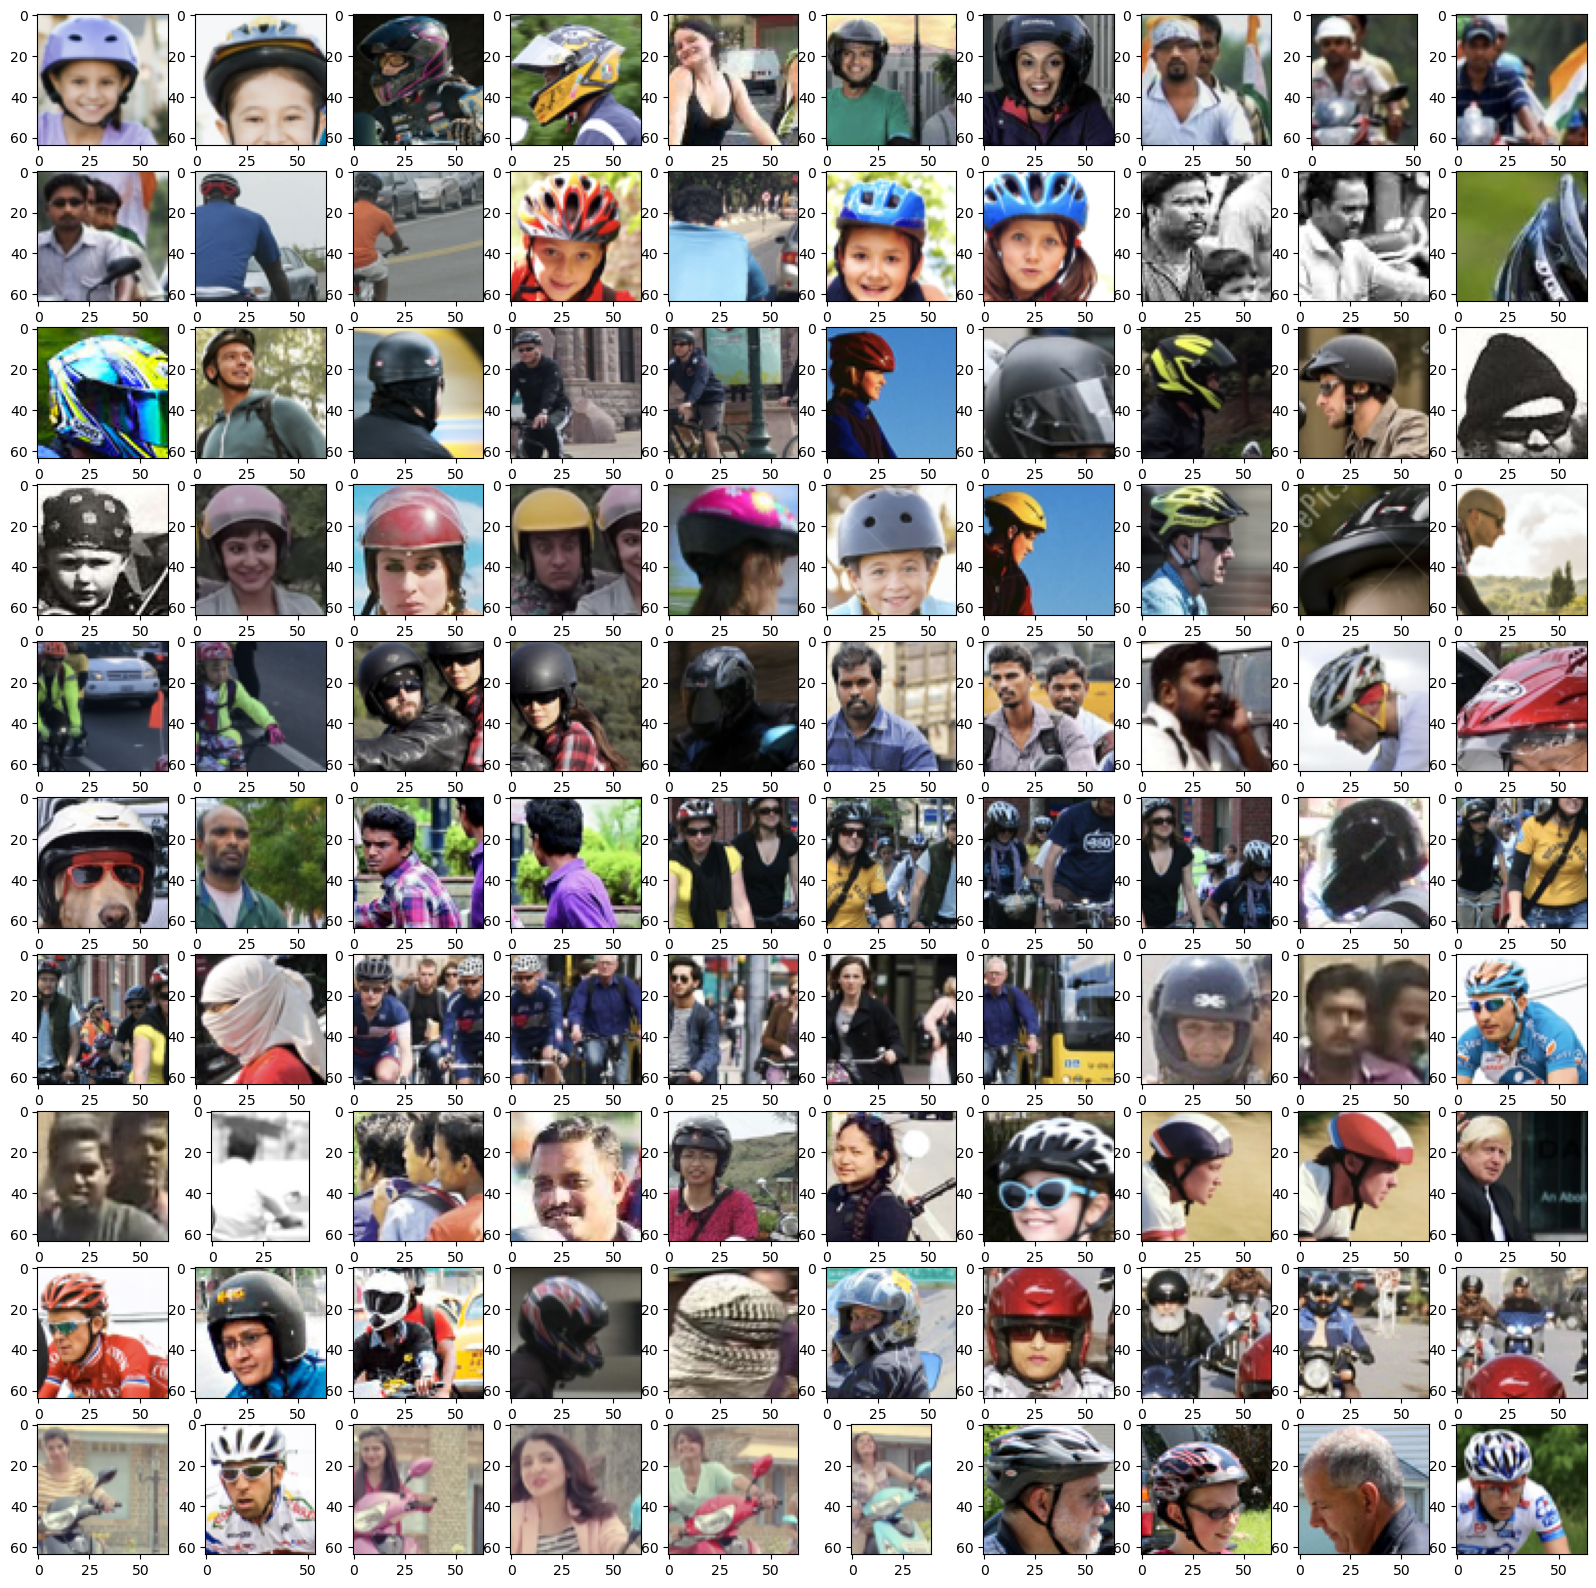

In [65]:
# 이미지 100개 확인해보기

cut_images = []

for img in glob.glob('../Semi_Data/cut_images/*') :
    cut_images.append(mpimg.imread(img))

plt.figure(figsize = (20, 20))

for i, image_o in enumerate(cut_images[:100]) :
    plt.subplot(10, 10, i+1)
    plt.imshow(image_o)

In [7]:
img_label_num = [1 if i == 'With Helmet' else 0 for i in img_label]

In [8]:
img_label_num

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,


In [9]:
img_label

['With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'Without Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'Without Helmet',
 'Without Helmet',
 'Without Helmet',
 'Without Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With Helmet',
 'With He

In [10]:
cut_images

[array([[[0.9254902 , 0.90588236, 0.87058824],
         [0.9137255 , 0.8862745 , 0.84705883],
         [0.89411765, 0.8666667 , 0.81960785],
         ...,
         [0.6117647 , 0.6431373 , 0.6627451 ],
         [0.6156863 , 0.64705884, 0.6666667 ],
         [0.61960787, 0.6509804 , 0.6666667 ]],
 
        [[0.93333334, 0.9137255 , 0.8862745 ],
         [0.9254902 , 0.90588236, 0.87058824],
         [0.91764706, 0.89411765, 0.85882354],
         ...,
         [0.6117647 , 0.6431373 , 0.6666667 ],
         [0.6156863 , 0.64705884, 0.67058825],
         [0.62352943, 0.654902  , 0.67058825]],
 
        [[0.9372549 , 0.91764706, 0.8862745 ],
         [0.92941177, 0.9098039 , 0.8745098 ],
         [0.9254902 , 0.90588236, 0.87058824],
         ...,
         [0.6039216 , 0.63529414, 0.6627451 ],
         [0.60784316, 0.6392157 , 0.6666667 ],
         [0.627451  , 0.654902  , 0.6666667 ]],
 
        ...,
 
        [[0.65882355, 0.627451  , 0.827451  ],
         [0.70980394, 0.6862745 , 0.86274

In [13]:
x_train = np.array(cut_images).reshape(np.array(cut_images).shape[0], -1)

AttributeError: 'list' object has no attribute 'reshape'

In [21]:
cut_images.toArray()

AttributeError: 'list' object has no attribute 'toArray'

In [67]:
np.array(cut_images)[1].shape

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15328\3038547595.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(cut_images)[1].shape


ValueError: could not broadcast input array from shape (64,64,3) into shape (64,)